# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [0]:
import sys

**Как получить путь к интерпретатору?**

In [0]:
sys.executable

'/usr/bin/python3'

**Как узнать, где ищутся модули для импорта?**

In [0]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

**Что может помочь написать кросс-платформенный код?**

In [0]:
sys.platform

'linux'

**Как перенаправить поток вывода?**

In [0]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [0]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [0]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [0]:
import this

In [0]:
sys.stdout = stdout 

In [0]:
import re
from collections import Counter, OrderedDict

In [0]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [0]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [0]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [0]:
# !pip install pympler 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from itertools import permutations
from memory_profiler import memory_usage
from functools import lru_cache
import psutil
from pympler import tracker

Для начала сгенерируем массив так, чтобы одного элемента (например, нуля) в нем было определенное кол-во процентов. Это нужно для того, чтобы выполнялся пункт 1 из Премечания к задаче:

In [0]:
def generate_int_array(size, element, p_elem):
    """
        This function generates array of integers in range [0, 5] with given probability 
        of definite element in range [0, 5]. The remaining elements are generated
        from uniform distribution.
        
        :param size: Size of array
        :type size: int
        
        :param element: Element in range [0, 5] with given probability 
        :type element: int
        
        :param p_elem: Probability of element, in [0,1]
        :type p_elem: float
        
        :returns: New random array if range [0, 5] with probability p_elem for element.
        :rtype: list
    """
    try:
        size = int(size)
        element = int(element)
        p_elem = float(p_elem)
    except ValueError:
        print("Wrong number type")
        raise

    if size <= 0:
        raise ValueError('size should be positive')
    if (element < 0) or (element > 5):
        raise ValueError('element should be in range [0,5]')
    if (p_elem < 0) or (p_elem > 1):
        raise ValueError('p_elem should be in range [0,1]')

    np.random.seed(123)
    elements = list(range(6))
    p_not_elem = (1 - p_elem) / (len(elements) - 1)
    probabilities = []
    for e in elements:
        if e == element:
            probabilities.append(p_elem)
        else:
            probabilities.append(p_not_elem)
    return np.random.choice(elements, size, p=probabilities)


# generate_int_array(32, 3, 0.4)

Напишем функцию, которая строит график зависимости времени работы алгоритма от количества элементов в нем:

In [0]:
def graphs(func, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    lens = np.linspace(10, 20000, num=500, dtype=int)
    times = []

    for i in lens:
        array = list(generate_int_array(i, element, 0.4))
        st = time.time()
        res = func(array)
        et = time.time()
        times.append((et - st) * 1000)

    plt.figure(figsize=(15, 7))
    plt.title('Function run time depending on the length of the arrays')
    plt.ylabel('Time in ms')
    plt.xlabel('The length of array')
    plt.plot(lens, times)

Функция по удалению определенного значения из массива работает по следующему принципу: все значения в массиве, не равные элементу для удаления, передвигаются влево в исходном массиве. Таким образом, справа в исходном массиве остаются элементы для удаления. Функция возвращает левую часть массива, в которой нет элементов для удаления.

Функция использует свего 3 переменные: __len_arr__ - длина входящего массива, __i__ - переменная для итерирования по массиву и __counter__ - переменная-счетчик количества элементов для удаления, т.е. использует всего O(1) памяти.

Время работы функции: О(n), где n - длина массива, т.к. функция проходится по каждому элементу массива всего 1 раз.

In [0]:
from functools import partial


def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    len_arr = len(array)
    counter = 0
    i = 0
    
    if (element < 0) or (element > 5):
        raise ValueError('element should be in range [0,5]')
    
    for i in range(len_arr):
        if (array[i] == element):
            counter = counter + 1
        if (counter > 0) and (array[i] != element):
            array[i - counter] = array[i]
            array[i] = element
            
    return array[:-counter]

delete_zeros_from_array_part = partial(delete_elements_from_array, element=0)
# delete_zeros_from_array_part([1,2,4,0,4,4,3,1,4,4,4], element=4)

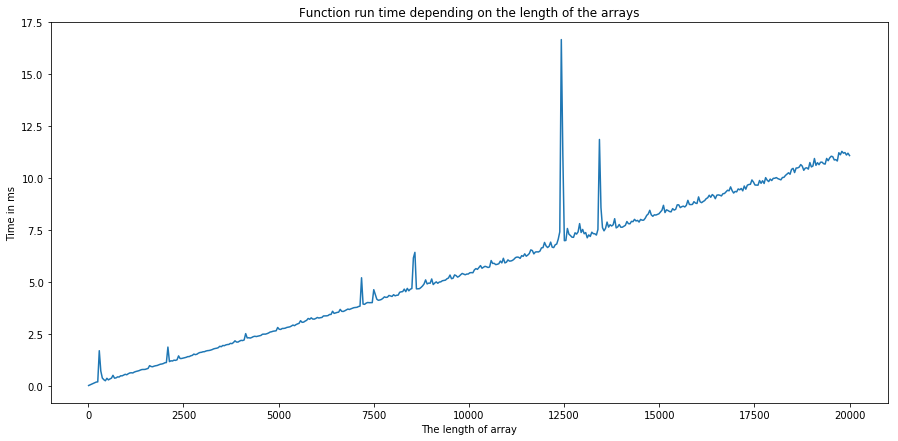

In [0]:
graphs(delete_zeros_from_array_part, 1)

На графике выше действительно видно, что засимость времени выполнения функции от кол-ва элементов в массиве, подающимся в функцию, линейная.

Зачем нужна doc string? 

__Ответ:__ doc string нужны для того, чтобы создавать автоматическую документацию для модулей, функций, классов и методов. 

Как её посмотерть?

In [0]:
print(graphs.__doc__)


        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    


### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

Для начала напишем функцию, которая считает модуль комплексного числа (модуль в случае, если число на входе вещественное).

In [0]:
def calculate_module(number):
    """ 
        Find the module of complex number.
        
        :param number: Input complex number
        :type number: {int, float, complex}
        
        :returns: The module of number
        :rtype: float
    """
    if isinstance(number, complex):
        return np.sqrt(number.real**2 + number.imag**2)
    elif isinstance(number, (int, float)):
        return np.abs(number)
    else:
        raise TypeError("Wrong number type for %s " % number)

# calculate_module(9+8j)
calculate_module(9)

9

Теперь напишем функцию опеределения числа с минимальным модулем среди трех комплексных чисел.

In [0]:
def find_min(n1, n2, n3):
    """
        Find the number with minimum module among 3 complex numbers.
        
        :param n1: Input complex number 1
        :type n1: {int, float, complex}
        
        :param n2: Input complex number 2
        :type n2: {int, float, complex}
        
        :param n3: Input complex number 3
        :type n3: {int, float, complex}
        
        :returns: The number (n1, n2 or n3) with the minimum module 
        :rtype: {int, float, complex}
    """
    nums = [n1, n2, n3]
    for n in nums:
        if not isinstance(n, (int, float, complex)):
            raise ValueError("Wrong number type for %s " % n)

    min_sq_mod = calculate_module(nums[0])
    min_sq_mod_id = 0
    for i, n in enumerate(nums[1:]):
        cur_sq_mod = calculate_module(n)
        if (cur_sq_mod < min_sq_mod):
            min_sq_mod = cur_sq_mod
            min_sq_mod_id = i + 1

    return nums[min_sq_mod_id]


# find_min(-3 + 9j, None, complex(1, 2))
# find_min(-3 + 9j, 3 + 6j, complex(1, 2))
# find_min(3,"[4,3]",90j+1)
# find_min(np.inf,np.inf,np.inf)
find_min(0, -1, 0.5)

0

Далее представим, что нам нужно находить минимум среди более чем трех чисел. Напишем для этого функцию:

In [0]:
def find_min_in_array(array):
    """
        Find the number with minimum module among array of complex numbers.
        
        :param array: Input array of complex numbers
        :type array: list
        
        :returns: The number from array with the minimum module 
        :rtype: {int, float, complex}
    """
    nums = array

    if not isinstance(nums, list):
        raise TypeError("Wrong number type for array")

    for n in nums:
        if not isinstance(n, (int, float, complex)):
            raise ValueError("Wrong number type for %s " % n)

    min_sq_mod = calculate_module(nums[0])
    min_sq_mod_id = 0
    for i, n in enumerate(nums[1:]):
        cur_sq_mod = calculate_module(n)
        if (cur_sq_mod < min_sq_mod):
            min_sq_mod = cur_sq_mod
            min_sq_mod_id = i + 1

    return nums[min_sq_mod_id]


find_min_in_array([0, -1, 1 + 9j, 2])

0

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

Функция, которая делит массив на 4 равные части:

In [0]:
def devide_into_four(number, n):
    """
        Devide the number into n parts of equal length.
        
        :param number: Input positive number, its length should be a multiple of n
        :type number: int
        
        :param n: The number of parts to devide, > 0 
        :type n: int
        
        :returns: The number devided into 4 parts of equal length
        :rtype: list
    """
    try:
        number = int(number)
        n = int(n)
    except ValueError:
        print("Wrong number type")
        raise

    if number <= 0:
        raise ValueError('number should be positive')
    if n <= 0:
        raise ValueError('n should positive')

    number = np.array([x for x in str(number)])

    if len(number) % 4 != 0:
        raise Exception('Can not devide number into equal parts')

    number = [list(x) for x in np.array_split(number, n)]
    return [int("".join(x)) for x in number]


# devide_into_four(1234567890123355, 4)
# devide_into_four(12434, 4)

Вычисление чисел Фибоначчи за O(log n):

In [0]:
result_fib = [0] * 100000


@lru_cache(maxsize=None)
def calculate_fibonacci(number):
    """
        Calculate fibonacci of given number.
        
        :param number: Input positive number
        :type number: int
        
        :returns: Fibonacci of given number
        :rtype: int
    """
    if number < 0:
        raise ValueError('number should be positive')

    if number == 0:
        return 0

    if (number == 1) or (number == 2):
        result_fib[number] = 1
        return result_fib[number]

    if result_fib[number] != 0:
        return result_fib[number]

    if number % 2 == 1:
        k = (number + 1) // 2
        fib_k = calculate_fibonacci(k)
        fib_k_prev = calculate_fibonacci(k - 1)
        result_fib[number] = fib_k**2 + fib_k_prev**2
    else:
        k = number // 2
        fib_k = calculate_fibonacci(k)
        fib_k_prev = calculate_fibonacci(k - 1)
        result_fib[number] = (2 * fib_k_prev + fib_k) * fib_k

    return result_fib[number]


# calculate_fibonacci(9999)

Алгоритм Евклида для поиска наибольшего общего делителя:

In [0]:
def calculate_GCD(n1, n2):
    """
        Finds the greatest common divider of n1 and n2 with Euclidean algorithm.
        
        :param n1: Input positive number 1
        :type n1: int
        
        :param n2: Input positive number 2
        :type n2: int
        
        :returns: The greatest common divider of n1 and n2
        :rtype: int
    """
    try:
        n1 = int(n1)
        n2 = int(n2)
    except ValueError:
        print("Wrong number type")
        raise

    if n1 <= 0:
        raise ValueError('n1 should be positive')
    if n2 <= 0:
        raise ValueError('n2 should positive')

    while (n1 != 0) and (n2 != 0):
        if n1 > n2:
            n1 = n1 % n2
        else:
            n2 = n2 % n1
    return n1 + n2


# calculate_GCD(10,5)
# calculate_GCD("s10",5)

Вычисление медианы для массива:

In [0]:
def calculate_median(array):
    """
        Calculate the median of the array.
        
        :param array: Input array, length > 0
        :type array: list
        
        :returns: The median of the array
        :rtype: {int, float}
    """
    if not isinstance(array, list):
        raise TypeError("Wrong number type for array")

    if len(array) == 0:
        raise Exception("Can not find median of empty array")

    return np.quantile(array, 0.5)


# calculate_median([1,2,3,4])
# calculate_median([5,2,6,1,2])
calculate_median([5.1,2.2,6.3,1.2,2.2])
# calculate_median([])

2.2

Реализация работы банкомата:

In [0]:
from itertools import permutations


def ATM(card, pin):
    """
        Reads the number of the card inserted into ATM, parses it 
        into 4 equal parts and generates 4 Fibonacci numbers with 
        numbers corresponding to the parched parts. Then it generates 
        numbers from all kinds of permutations of the obtained 
        Fibonacci numbers (concatenation). For each number from the 
        set received, the ATM finds a GCD with the password entered 
        by the user and returns the median of the received GCDs.
        
        :param card: Input positive card number
        :type card: int
        
        :param card: Input positive card number
        :type card: int
        
        :returns: The median of the array described above.
        :rtype: {int, float}
    """
    try:
        card = int(card)
        pin = int(pin)
    except ValueError:
        print("Wrong number type")
        raise

    if card <= 0:
        raise ValueError('card should be positive')
    if pin <= 0:
        raise ValueError('pin should positive')

    len_card = len(str(card))
    nums = devide_into_four(card, 4)
    fibs = [calculate_fibonacci(x) for x in nums]
    all_permutations = list(permutations(fibs))
    permutations_joined = [int("".join([str(x) for x in p])) for p in all_permutations]
    gcfs = [calculate_GCD(x, pin) for x in permutations_joined]
    return calculate_median(gcfs)


# ATM('4444', 1245)
# ATM(4444, 1245)
ATM(4444888305382092, 1242)

18.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

Создадим трекер памяти:

In [0]:
tr = tracker.SummaryTracker()

Реализуем одинаковые функции для _list_ и _deque_:

In [0]:
import time
from collections import deque

N = 50000

types = [deque, list]


def append(x):
    """
        Append N elements to the end of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(len(x)):
        x.append(i)


def appendleft(x):
    """
        Append N elements to the begining of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if isinstance(x, deque):
        for i in range(len(x)):
            x.appendleft(i)
    else:
        for i in range(len(x)):
            x.insert(0, i)


def pop(x):
    """
        Delete N elements from the end of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        if isinstance(x, list):
            x = list(range(N))
        else:
            x = deque(range(N))

    for i in range(len(x)):
        x.pop()


def popleft(x):
    """
        Delete N elements from the begining of array
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        if isinstance(x, list):
            x = list(range(N))
        else:
            x = deque(range(N))

    if isinstance(x, deque):
        for i in range(len(x)):
            x.popleft()
    else:
        for i in range(len(x)):
            x.pop(0)


def remove(x):
    """
        Remove the first occurrence of values in range [0, N]
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        if isinstance(x, list):
            x = list(range(N))
        else:
            x = deque(range(N))

    for i in range(len(x)):
        x.remove(i)


def rotate(x):
    """
        Rotate the array n steps to the right. n in range [0,N]
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        raise ValueError("Can not rotate elements from empty list / deque")

    if isinstance(x, deque):
        for i in range(len(x)):
            x.rotate(i)
    else:
        for i in range(len(x) - 1, -1, -1):
            x[i:] + x[:i]


def count(x):
    """
        Count the number of array elements equal to n, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(len(x)):
        x.count(i)


def insert(x):
    """
        Insert n into the deque at position 1, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    for i in range(len(x)):
        x.insert(i, 1)


def index(x):
    """
        Return the position of n in the array, n in range [0,N].
        
        :param x: Input array
        :type x: deque / list
    """
    if not isinstance(x, tuple(types)):
        raise ValueError("Wrong number type for x")

    if len(x) == 0:
        raise ValueError("Can not index elements from empty list / deque")

    for i in range(len(x)):
        x.index(i)


funcs = [
    append, appendleft, pop, popleft, remove, rotate, count, insert, index
]

for type in types:
    for func in funcs:
        array = type(range(N))

        start_time = time.time()
        func(array)
        end_time = time.time()
        alltime = end_time - start_time

        mem_usage = memory_usage((func, (array, )))
        allmemory = np.max(mem_usage)  # - np.min(mem_usage)

        print("%s / %s : time %.3f, memory %.3f " %
              (type.__name__, func.__name__, alltime, allmemory))

    print('-----------------------------------------')

deque / append : time 0.005, memory 208.312 
deque / appendleft : time 0.004, memory 208.316 
deque / pop : time 0.004, memory 184.945 
deque / popleft : time 0.003, memory 185.043 
deque / remove : time 0.005, memory 185.043 
deque / rotate : time 0.368, memory 185.211 
deque / count : time 29.727, memory 186.000 
deque / insert : time 1.402, memory 185.508 
deque / index : time 14.161, memory 186.262 
-----------------------------------------
list / append : time 0.005, memory 196.047 
list / appendleft : time 2.868, memory 189.852 
list / pop : time 0.004, memory 185.102 
list / popleft : time 0.226, memory 185.156 
list / remove : time 0.223, memory 185.152 
list / rotate : time 23.632, memory 185.250 
list / count : time 25.222, memory 186.539 
list / insert : time 1.918, memory 185.547 
list / index : time 12.870, memory 186.551 
-----------------------------------------


Для наглядности нарисуем графики замисимости времени и памяти, используемой функцией, от длины массива:

In [0]:
def build_time_memory_graphs(compare_objects, func=None):
    """
        This function builds graphics for comparison of different functions. 
        
        :param compare_objects: Input list of objects to compare
        :type compare_objects: list
        
        :param func: if we need to compare the same function on arrays of 
                     different types, 'func' is function to compare.
        :type func: function / None
        
    """
    N = 10000
    xrange = list(range(100, N, 100))
    np.random.seed(123)

    times = []
    mems = []
    func_param = func

    for obj in compare_objects:

        time_list = []
        mem_list = []

        if func == None:  # it means we compare functions listed in compare_objects
            type_array = list
            func = obj
        else:
            type_array = obj

        for i in xrange:
            array = type_array(range(i))
            start_time = time.time()
            N = i
            func(array)
            end_time = time.time()
            alltime = end_time - start_time
            time_list.append(alltime)

            mem_usage = memory_usage((func, (array, )))
            allmemory = np.max(mem_usage)
            mem_list.append(allmemory)

        times.append(time_list)
        mems.append(mem_list)

    default_titles = ['Time used', 'Memory used']
    if func_param != None:
        titles = [func.__name__ + ': ' + x for x in default_titles]
    else:
        titles = default_titles

    for lst, title in zip([times, mems], titles):
        plt.figure()
        plt.title(title)
        for i in range(len(lst)):
            plt.xlabel('The length of array')
            plt.plot(xrange, lst[i], label=compare_objects[i].__name__)
            plt.legend()

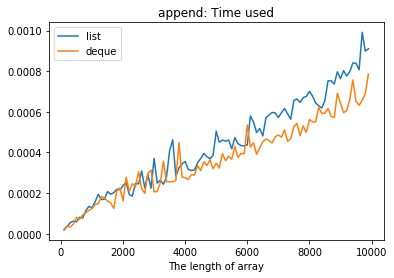

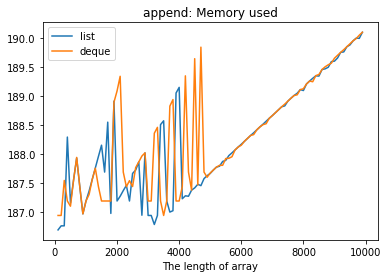

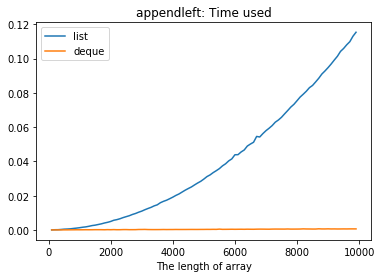

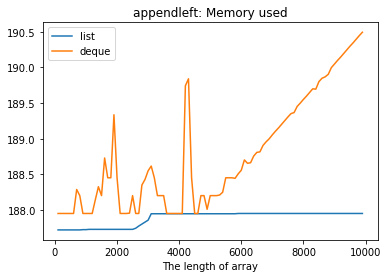

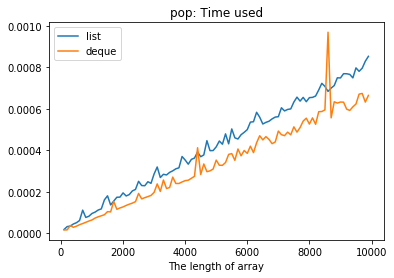

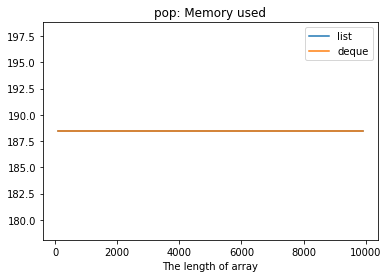

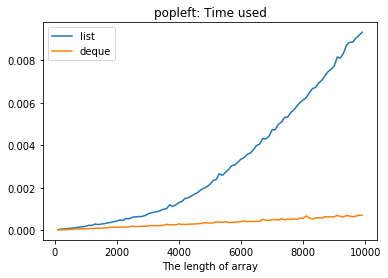

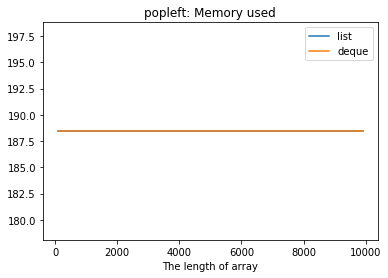

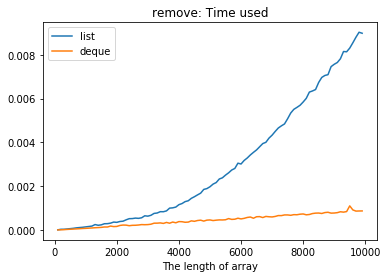

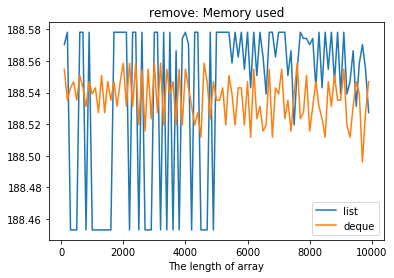

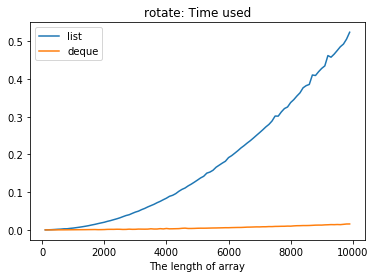

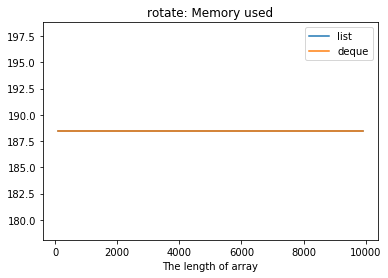

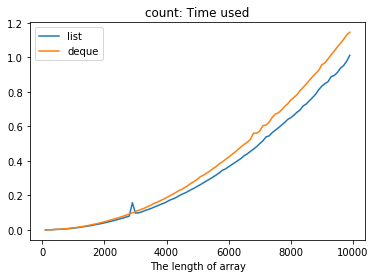

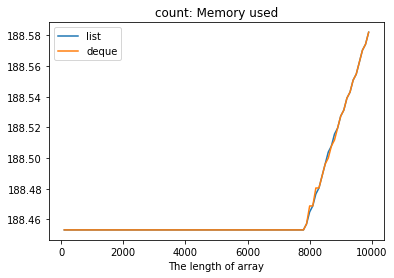

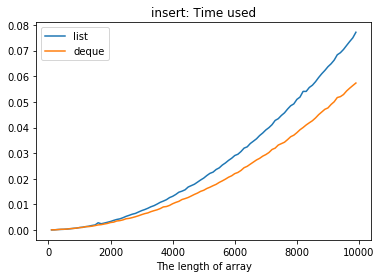

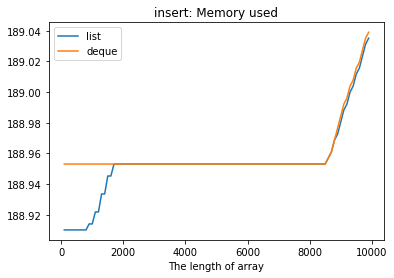

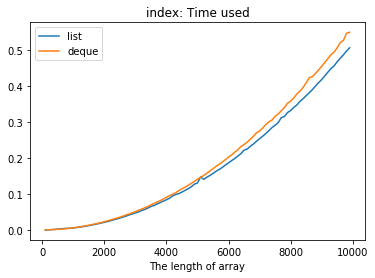

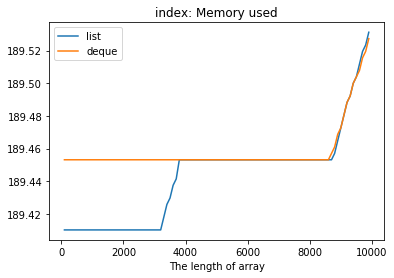

In [0]:
compare_funcs = [
    append, appendleft, pop, popleft, remove, rotate, count, insert, index
]

for function in compare_funcs:
    build_time_memory_graphs([list, deque], func=function)

Сильнее всего различие во времени выполнения наблюдается у функций appendleft и popleft: у deque это примерно константа, а у list - линейное или даже квадратичное время. График remote напоминает график popleft, т.к. удаление элементов происходило слева направо, как и в popleft (но с помощью remove, а не pop(0)). 

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [0]:
def my_permutations(array):
    """
        Return permutations of elements in array

        :param array: Input array, length > 0
        :type array: list

        :returns: Permutations of elements in array
        :rtype: list
    """
    array = list(array)
    len_array = len(array)

    if len_array == 0:
        raise Exception("Can not get permutations of empty array")
    else:
        # otherwise the function 'my_permutations' raises the exception
        if len(array[1:]) > 0:  
            for permutations in my_permutations(array[1:]):
                for i in range(len_array):
                    yield permutations[:i] + [array[0]] + permutations[i:]
        else:
            yield array

Проверка на совпадение кол-ва перестановок из itertools и из my_permutations:

In [0]:
arr = [1,9,3,0,0,8]
print(len(list(my_permutations(arr))) == len(list(permutations(arr))))

True


Теперь сравним время работы функций и кол-во потребляемой памяти:

In [0]:
funcs = [permutations, my_permutations]
np.random.seed(123)
array = np.random.randint(3, size=200)
print('Random array:', array)

time_list = []

for func in funcs:
    start_time = time.time()
    func(array)
    end_time = time.time()
    alltime = end_time - start_time
    time_list.append(alltime)
    mem_usage = memory_usage((func, (array,)))
    allmemory = np.max(mem_usage) - np.min(mem_usage)
    print(func.__name__, ':', 'time', alltime, ', memory', allmemory)

Random array: [2 1 2 2 0 2 2 1 2 1 2 1 0 1 2 1 0 2 0 1 2 1 0 0 0 0 1 2 0 2 0 0 1 0 1 0 0
 0 2 1 1 2 2 2 1 0 0 2 1 0 2 2 2 2 1 2 0 1 0 2 0 2 1 2 0 2 2 0 2 1 2 1 1 2
 0 0 1 0 2 1 1 0 1 1 0 0 1 2 1 1 1 2 0 2 2 1 2 2 1 2 0 2 2 1 1 2 2 0 1 1 0
 1 0 1 2 2 0 1 1 1 0 1 1 0 2 1 2 0 1 0 2 0 0 2 0 2 1 0 0 0 0 0 0 1 0 0 0 2
 2 1 1 0 2 2 1 2 2 0 2 0 0 1 2 1 1 0 1 1 2 0 1 1 0 2 1 1 2 1 2 2 2 1 1 2 2
 2 1 1 2 2 0 0 2 1 2 2 1 1 2 2]
permutations : time 4.482269287109375e-05 , memory 0.0
my_permutations : time 9.775161743164062e-06 , memory 0.0


Теперь то же самое, только на массивах разной длины:

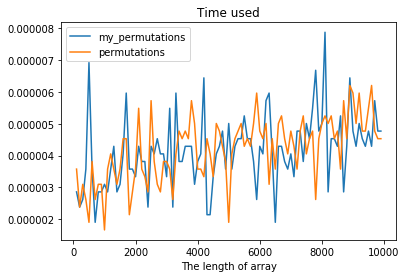

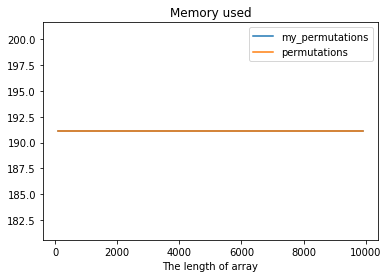

In [0]:
build_time_memory_graphs([my_permutations,permutations])

Из графиков выше видно, что обе функции по подсчетку перестановок работают примерно одно и то же время и используют примерно одинаковое количество памяти.